In [6]:
from sklearn import svm
import pylab
import numpy as np
import math
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ================================================== #
# Generate Points with Normal Distribution, generate the same dataset over and over again
#  ================================================== #


In [7]:
np.random.seed(100)
classA = np.concatenate((np.random.randn(10,2) * 0.2 + [1.5, 0.5] ,np.random.randn(10,2) * 0.2 + [(-1.5) , 0.5] ))
classB = np.random.randn(20, 2) * 0.2 + [ 0.0 , (-0.5)]
inputs = np.concatenate((classA, classB))
targets = np.concatenate((np.ones(classA.shape[0]) , -np.ones(classB.shape[0])))
N = inputs.shape[0] # Number of rows ( samples )
permute= list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]


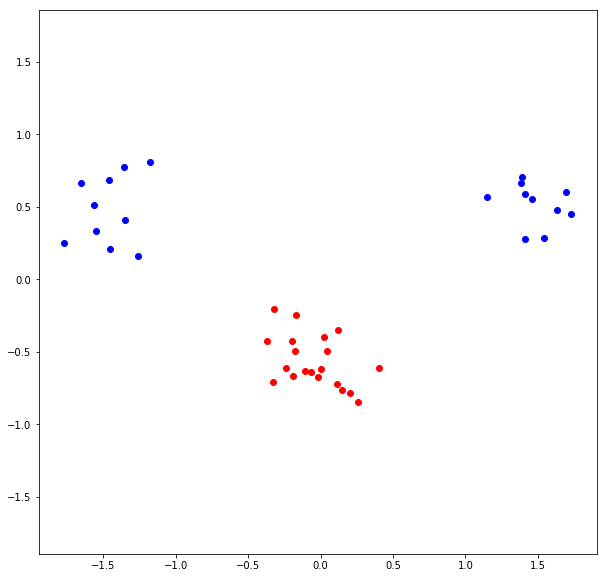

In [3]:
plt.figure(figsize=(10,10))
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'bo')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'ro')
plt.axis('equal')
plt.savefig('origonal_graph.jpg')
plt.show()

# ================================================== #
# Kernel Functions
# ================================================== #

In [8]:
def L(x, y): #LinKernel
    return np.dot(x, y)

def PK(x, y): #PolyKernel
    po= 10
    return pow(np.dot(x, y) + 1, po)

def R(x, y): #radial_kernel
    sigma = 3
    diff = np.subtract(x, y)
    return math.exp((-np.dot(diff, diff)) / (2 * sigma * sigma))

#def sigmoid_kernel(x, y, k, delta):
    #return math.tanh(k * np.dot(x, y) - delta)


# ================================================== #
# Object Functions
# ================================================== #

In [9]:
#An objective function expresses the main aim of the model which is either to be minimized or maximized alpha in or modal 

def matrix(inputs, kernel):
    N = len(inputs)
    P = np.zeros((N, N))
    for i in range(0, N):
        for j in range(0, N):
            P[i][j] = (targets[i]) * (targets[j]) * kernel((inputs[i]), (inputs[j]))
    return P


#objective
def objective(x):
    Y = np.dot(P, x) 
    Y = np.dot(Y, x)                                                       
    return 0.5* np.sum(Y) - np.sum(x)

#start    
start = np.zeros(N)


#"Bound for support vectors" 
C = 1
B=[(0, C) for b in range(N)]

#Constraint definition
def zerofun(x):
    Z= np.dot(x,targets)
    return Z
                                                            
#kernel
kernel = PK
#constraint
XC=({'type':'eq','fun':zerofun})
#P matrix
P = matrix(inputs, kernel)
#result
ret = minimize(objective , start ,bounds=B, constraints=XC )
alpha = ret['x']
print(alpha)


[2.41696378e-14 4.78732741e-15 9.30933488e-15 1.29994850e-04
 4.53010362e-15 1.55507774e-15 0.00000000e+00 0.00000000e+00
 9.69587053e-15 3.12019892e-14 0.00000000e+00 6.19705451e-15
 2.20778831e-15 3.44507471e-14 5.73916099e-15 6.80398284e-15
 1.12104937e-14 7.70483202e-15 1.08982033e-15 5.54142348e-15
 5.45679525e-15 1.90973232e-14 2.83553871e-14 2.04650294e-14
 2.10555439e-14 4.30594080e-15 1.60205667e-14 5.26103609e-15
 5.42588638e-15 5.87353705e-15 0.00000000e+00 2.49314439e-04
 0.00000000e+00 6.54708134e-15 5.15556567e-15 4.53369451e-15
 6.24216664e-15 1.19319589e-04 3.18799003e-14 1.60111604e-14]


In [10]:
# Filter non-zero vectors
i = alpha > 0.00001
nalpha = alpha[i]
ninputs = inputs[i]
print(ninputs)
ntargets = targets[i]

[[-1.26207555  0.16187663]
 [-0.3227157  -0.20585723]
 [ 1.15004691  0.56853608]]


In [11]:
#calc b
def B(ninputs, kernel):
    sum = 0
    for i in range(ninputs.shape[0]):
        sum += nalpha[i]* ntargets[i] * kernel(ninputs[0],ninputs[i])
    zz= sum - ntargets[0]
    return zz 

In [12]:
b = B(ninputs, kernel)
def indicator(x,y):
    sum = 0
    p = np.array([x,y])
    for i in range(0, ninputs.shape[0]):
        sum += nalpha[i] * ntargets[i] * kernel(p,ninputs[i])
    ind_fuh= sum - b
    return ind_fuh

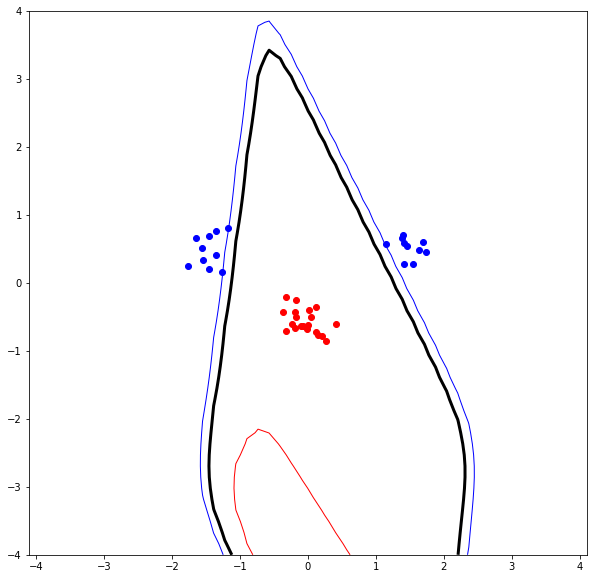

In [13]:
#def plot_data(classA, classB):
plt.figure(figsize=(10,10))
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'bo')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'ro')
xgrid = np.linspace(-4 , 4)
ygrid = np .linspace(-4 , 4)
grid=np.array([[ indicator ( x , y )
        for x in xgrid ]
        for y in ygrid ] )
plt.contour( xgrid , ygrid , grid ,
    ( -1.0 , 0.0 , 1.0 ) ,
    colors =( 'red' ,  'black'  ,  'blue'  ) ,
    linewidths =(1 , 3 , 1 ) )
plt.axis('equal')
plt.savefig('kernel= R=3 , C value is 1 .jpg')
plt.show()